# ELTE Signal processing course 2018/2019-1
# Assignment 1
## 09.17.2018

## Task 1
### Mirrorring a vector on an manifold with $\underline{n}$ normal
Let $\underline{v}$ a vector to reflect. Here is how to write the reflection matrix $\matrix{R}$ using the Householder transformation:

$$
\matrix{R} = \matrix{I} - 2 \left( \underline{n} \otimes \underline{n}^{T} \right)
$$

Where $\underline{n}$ is the normal (unit) vector of the subspace.

In [1207]:
import numpy as np
import matplotlib.pyplot as plt

##### Entering the rank of the system

In [1208]:
Rank_f1 = int(input("Choosen rank: "))

Choosen rank: 6


##### Entering the elements of the $\underline{v}$ vector

In [1209]:
v_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    v_f1[i] = float(input("v vector's element of index #" + str(i+1) + ": ") or "0")

v vector's element of index #1: 4
v vector's element of index #2: -1
v vector's element of index #3: 7
v vector's element of index #4: 42
v vector's element of index #5: 137
v vector's element of index #6: -68


In [1210]:
print("Created v vector: ", v_f1)

Created v vector:  [  4.  -1.   7.  42. 137. -68.]


##### Entering the elements of the $\underline{n}$ vector

In [1211]:
n_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    n_f1[i] = float(input("n vector's element of index #" + str(i+1) + ": ") or "0")

n vector's element of index #1: 5
n vector's element of index #2: 1
n vector's element of index #3: -6
n vector's element of index #4: -4
n vector's element of index #5: -1
n vector's element of index #6: -8


In [1549]:
# Normalize the vector, creating an N unit vector
n_norm_f1 = n_f1/np.linalg.norm(n_f1)

print("Created (normalized) n vector: ", n_norm_f1)

Created (normalized) n vector:  [ 0.41812101  0.0836242  -0.50174521 -0.3344968  -0.0836242  -0.66899361]


##### Creating Identity matrix

In [1213]:
I_f1 = np.eye(Rank_f1)

print("Created Identity matrix: \n", I_f1)

Created Identity matrix: 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


##### Composing Reflection matrix

In [1214]:
Ref_f1 = I_f1 - 2*(np.outer(n_norm_f1,n_norm_f1.T))

print("Created Reflection matrix: \n", Ref_f1)

Created Reflection matrix: 
 [[ 0.65034965 -0.06993007  0.41958042  0.27972028  0.06993007  0.55944056]
 [-0.06993007  0.98601399  0.08391608  0.05594406  0.01398601  0.11188811]
 [ 0.41958042  0.08391608  0.4965035  -0.33566434 -0.08391608 -0.67132867]
 [ 0.27972028  0.05594406 -0.33566434  0.77622378 -0.05594406 -0.44755245]
 [ 0.06993007  0.01398601 -0.08391608 -0.05594406  0.98601399 -0.11188811]
 [ 0.55944056  0.11188811 -0.67132867 -0.44755245 -0.11188811  0.1048951 ]]


##### Reflecting $\underline{v}$ vector with the $\matrix{R}$ matrix on manifold with $\underline{n}$ normal component

In [1215]:
V_reflected_f1 = Ref_f1@v_f1

print("Reflected vector: ", V_reflected_f1)

Reflected vector:  [-11.1048951   -4.02097902  25.12587413  54.08391608 140.02097902
 -43.83216783]


#### Conditions

Reflection matrix should be:
- Hermitian: $R = R^{+}$
- Unitary: $R^{-1} = R^{+}$
- Involutory: $R^{2} = I$
- $det(R) = -1$ (Householder matrix)

Test these conditions!

In [1216]:
# Hermitian?
if(np.linalg.det(np.around((Ref_f1.conj().T - Ref_f1), 8)) == 0):
    print("R is Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))
else:
    print("R is not Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))    
print("\n")

# Unitary?
if(np.linalg.det(np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8)) == 0):
    print("R is unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
else:
    print("R is not unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
print("\n")

# Involutory?
if(np.linalg.det(np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8)) == 0):
    print("R is involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))
else:
    print("R is not involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))    
print("\n")

# Calculate determinant: does it equal to -1?
if(np.around(np.linalg.det(Ref_f1), 8) == -1):
    print("The Reflection matrix's determinant does equal to -1!")
else:
    print("The Reflection matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Ref_f1), 8))

R is Hermitian!
R^+ - R:
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


R is unitary!
R^+ - R^-1:
 [[ 0. -0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0. -0.  0.]
 [ 0.  0. -0. -0.  0.  0.]
 [ 0.  0. -0. -0. -0.  0.]]


R is involutory!
R^2 - I:
 [[ 0.  0. -0.  0.  0. -0.]
 [ 0.  0.  0.  0.  0. -0.]
 [-0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-0. -0.  0.  0.  0.  0.]]


The Reflection matrix's determinant does equal to -1!


## Task 2
### Composing an $\Omega$ rotation matrix

Let $\underline{x}$ be an $n$ dimensional vector to rotate. Let $\underline{y}$ be the vector in which we want to rotate the former. Based on these, we define the following $\left( \underline{u},\underline{v} \right)$ base using the [Gram-Schmidt process](https://math.stackexchange.com/questions/525276/rotation-matrix-in-arbitrary-dimension-to-align-vector):

$$
\underline{u} = \frac{\underline{x}}{\left\lVert \underline{x} \right\lVert}
$$

and

$$
\underline{v} = \frac{\left( \underline{y} − \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right)}{\left\lVert \underline{y}− \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right\lVert}
$$

A general rotation matrix in the n-dimension [can be specified as follows](https://math.stackexchange.com/questions/598750/finding-the-rotation-matrix-in-n-dimensions):

$$
R = I - \underline{u} \otimes \underline{u}^{T} - \underline{v} \otimes \underline{v}^{T} + \left[ \underline{u},\underline{v} \right] \matrix{R}_{\theta} \left[ \underline{u},\underline{v} \right] ^{T}
$$

Where

$$
\left[ \underline{u},\underline{v} \right]
$$

is a matrix with $ n \times 2 $ elements, where the first column is the $\underline{u}$ vector, and the second is the $\underline{v}$ vector. We multipy this with an $\matrix{R}_{\theta}$ matrix, which we define as follows:

$$
\matrix{R}_{\theta} = 
\begin{pmatrix} 
    \cos(\theta) & -\sin(\theta) \\ 
    \sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

Where

$$
\cos(\theta) = \frac{\underline{x} \cdot \underline{y}}{\left\lVert \underline{x} \right\lVert \left\lVert \underline{y} \right\lVert}
$$

In [1231]:
import math

##### Entering the rank of the system

In [1232]:
Rank_f2 = int(input("Choosen rank: "))

Choosen rank: 3


##### Entering the elements of the x vector

In [1233]:
x_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    x_f2[i] = float(input("X vector's element of index #" + str(i+1) + ": ") or "0")

X vector's element of index #1: 5
X vector's element of index #2: -1
X vector's element of index #3: 8


In [1234]:
print("Created X vector: ", x_f2)

Created X vector:  [ 5. -1.  8.]


##### Entering the elements of the y vector

In [1235]:
y_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    y_f2[i] = float(input("Y vector's element of index #" + str(i+1) + ": ") or "0")

Y vector's element of index #1: 4
Y vector's element of index #2: 7
Y vector's element of index #3: 9


In [1236]:
print("Created Y vector: ", y_f2)

Created Y vector:  [4. 7. 9.]


##### Creating vector u and v with Gram-Schmidt-process

In [1237]:
# Creating u
u_f2 = x_f2 / np.linalg.norm(x_f2)

# Creating v
BaseFor_v_f2 = y_f2 - (u_f2*y_f2)*u_f2
v_f2 = BaseFor_v_f2 / np.linalg.norm(BaseFor_v_f2)

In [1238]:
print("Created U vector: ", u_f2)

print("Created V vector: ", v_f2)

Created U vector:  [ 0.52704628 -0.10540926  0.84327404]
Created V vector:  [0.36389983 0.87195998 0.32750985]


##### Creating the identity- and the R matrix

In [1239]:
# Creating Indetity
I_f2 = np.eye(Rank_f2)

print("Created Identity matrix: \n", I_f2)

Created Identity matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##### Defining R_theta matrix

In [1558]:
theta = math.acos(
            (np.dot(x_f2,y_f2)) /
            (np.linalg.norm(x_f2)*np.linalg.norm(y_f2))
        )

R_theta = np.matrix([[math.cos(theta), -math.sin(theta)],
           [math.sin(theta), math.cos(theta)]])

print("Angle between the two vectors: ", theta, "rads", "=", str(np.degrees(theta)) + "°\n")
print("Created R_theta matrix:\n", R_theta)

Angle between the two vectors:  0.7354674242595169 rads = 42.13917937942786°

Created R_theta matrix:
 [[ 0.74151722 -0.67093383]
 [ 0.67093383  0.74151722]]


##### Creating the Rotation matrix

In [1559]:
# The [u,v] matrix
u_v = np.column_stack((u_f2,v_f2))

print("[u,v] matrix:\n", u_v, "\n")

# The Rotation matrix
Rot_f2 = I_f2 - np.outer(u_f2,u_f2.T) - np.outer(v_f2,v_f2.T) + np.dot(np.dot(u_v,R_theta),u_v.T)

print("The Rotation matrix:\n", Rot_f2)

[u,v] matrix:
 [[ 0.52704628  0.36389983]
 [-0.10540926  0.87195998]
 [ 0.84327404  0.32750985]] 

The Rotation matrix:
 [[ 0.89397014 -0.4017305  -0.05561157]
 [ 0.26641449  0.80059984  0.46566073]
 [-0.23576326 -0.56734092  0.78846446]]


#### Conditions

(Householder) Rotation matrix should have:

- $det(R) = -1$
- Orthogonal: $R^{-1} = R^{T}$

In [1560]:
# Orthogonal?
if(np.linalg.det(np.around((Rot_f2.T - Rot_f2.I), 8)) == 0):
    print("R is orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - Rot_f2.I), 8))
else:
    print("R is not orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - Rot_f2.I), 8))
print("\n")

# Calculate determinant: does it equal to -1?
DetIndicator = -1

if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

R is not orthogonal!
R^T - R^-1:
 [[-0.07209136 -0.1093592  -0.08197211]
 [-0.05665828  0.05428431 -0.10223456]
 [-0.09618184 -0.18371409 -0.09916948]]


The Rotation matrix's determinant does not equal to -1!
It's actual value is: 0.92689017


In [1561]:
if(DetIndicator == 1):
    # The determinant of Householder matrix is always −1. So, mulitply the last row of M by −1 to get the final desired matrix.
    for k in range(Rank_f2):
        Rot_f2[Rank_f2-1,k] = -1 * Rot_f2[Rank_f2-1,k]

print("Corrected Householder Rotation matrix:\n", Rot_f2)

Corrected Householder Rotation matrix:
 [[ 0.89397014 -0.4017305  -0.05561157]
 [ 0.26641449  0.80059984  0.46566073]
 [ 0.23576326  0.56734092 -0.78846446]]


In [1564]:
# Check if the determinant is really -1 now
if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

The Rotation matrix's determinant does not equal to -1!
It's actual value is: -0.92689017


##### Discusson
The above orthogonalizating algorithm (Gram-Schmidt-process) is numerically rather unstable. That is why we have obtained a matrix with a determinant of only approxiamtely -1. The non-existence of orthogonality is also caused by this instability.

### Rotation matrices additive properties

For the sake of clarity, we'll work in 2-dimensions

In [1471]:
# Angle of rotation of the first matrix
theta_rot_add_1 = 30

# Rotation matrix #1
Rot_add_2D_1 = np.matrix([[math.cos(np.radians(theta_rot_add_1)), -math.sin(np.radians(theta_rot_add_1))],
           [math.sin(np.radians(theta_rot_add_1)), math.cos(np.radians(theta_rot_add_1))]])

print("First rotation matrix:\n",Rot_add_2D_1)

First rotation matrix:
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


In [1472]:
# Angle of rotation of the first matrix
theta_rot_add_2 = 40

# Rotation matrix #1
Rot_add_2D_2 = np.matrix([[math.cos(np.radians(theta_rot_add_2)), -math.sin(np.radians(theta_rot_add_2))],
           [math.sin(np.radians(theta_rot_add_2)), math.cos(np.radians(theta_rot_add_2))]])

print("Second rotation matrix:\n",Rot_add_2D_2)

Second rotation matrix:
 [[ 0.76604444 -0.64278761]
 [ 0.64278761  0.76604444]]


In [1473]:
# Angle of rotation of the Sum matrix
theta_rot_add_A = theta_rot_add_1 + theta_rot_add_2

# Rotation matrix #2
Rot_add_2D_A = np.matrix([[math.cos(np.radians(theta_rot_add_A)), -math.sin(np.radians(theta_rot_add_A))],
           [math.sin(np.radians(theta_rot_add_A)), math.cos(np.radians(theta_rot_add_A))]])

print("Second rotation matrix:\n",Rot_add_2D_A)

Second rotation matrix:
 [[ 0.34202014 -0.93969262]
 [ 0.93969262  0.34202014]]


In [1474]:
# Vector to rotate
v_rot_add = np.matrix([1,5])

print("Vector to rotate:", v_rot_add)

Vector to rotate: [[1 5]]


##### First rotation

In [1475]:
v_rotated_add_1 = Rot_add_2D_2@(Rot_add_2D_1@v_rot_add.T)

print("Rotation by", str(theta_rot_add_1) + "°", "then by", str(theta_rot_add_2) + "°:\n", v_rotated_add_1)

Rotation by 30° then by 40°:
 [[-4.35644296]
 [ 2.64979334]]


##### Second rotation

In [1476]:
v_rotated_add_2 = Rot_add_2D_A@v_rot_add.T

print("Rotation by", str(theta_rot_add_1) + "° +", str(theta_rot_add_2) + "° =", str(theta_rot_add_A) + "°\n", v_rotated_add_2)

Rotation by 30° + 40° = 70°
 [[-4.35644296]
 [ 2.64979334]]


##### Test wheter we got the same values

In [1485]:
print("Should be [0.,0.]:\n", np.around(v_rotated_add_2,14) - np.around(v_rotated_add_1,14))

Should be [0.,0.]:
 [[0.]
 [0.]]


### Interchangeability of rotation operators

We"ll work in 2-dimensions again

In [1446]:
# Angle of rotation of the first matrix
theta_rot_int_1 = 30

# Angle of rotation of the second matrix
theta_rot_int_2 = 50


# Rotation matrix #1
Rot_int_2D_1 = np.matrix([[math.cos(np.radians(theta_rot_int_1)), -math.sin(np.radians(theta_rot_int_1))],
           [math.sin(np.radians(theta_rot_int_1)), math.cos(np.radians(theta_rot_int_1))]])

# Rotation matrix #1
Rot_int_2D_2 = np.matrix([[math.cos(np.radians(theta_rot_int_2)), -math.sin(np.radians(theta_rot_int_2))],
           [math.sin(np.radians(theta_rot_int_2)), math.cos(np.radians(theta_rot_int_2))]])


print("First rotation matrix:\n",Rot_int_2D_1, "\n")
print("Second rotation matrix:\n",Rot_int_2D_2)

First rotation matrix:
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]] 

Second rotation matrix:
 [[ 0.64278761 -0.76604444]
 [ 0.76604444  0.64278761]]


##### First rotation

In [1452]:
v_rot_int_1 = Rot_int_2D_1@(Rot_int_2D_2@v_rot_add.T)

print("Rotation by", str(theta_rot_int_1) + "°","then by", str(theta_rot_int_2) + "°:\n", v_rot_int_1)

Rotation by 30° then by 50°:
 [[-4.75039059]
 [ 1.85304864]]


##### Second rotation

In [1487]:
v_rot_int_2 = Rot_int_2D_2@(Rot_int_2D_1@v_rot_add.T)

print("Rotation by", str(theta_rot_int_2) + "°","then by", str(theta_rot_int_1) + "°:\n", v_rot_int_2)

Rotation by 50° then by 30°:
 [[-4.75039059]
 [ 1.85304864]]


##### Test wheter we got the same values

In [1488]:
print("Should be [0.,0.]:\n", np.around(v_rot_int_2,14) - np.around(v_rot_int_1,14))

Should be [0.,0.]:
 [[0.]
 [0.]]


## Task 3
### Floating-point precision

![Large numbers](img/largenumbers.jpg)

#### [Guard Digits](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)
One method of computing the difference between two floating-point numbers is to compute the difference exactly and then round it to the nearest floating-point number. This is very expensive if the operands differ greatly in size. Assuming $p = 3$ (see Task 5)

$$
6.02 \times 10^{23} + 23
$$

would be calculated as

$$
x = 6.02 \times 10^{23}
$$
$$
y = 0.00000000000000000000023 × 10^{23}
$$
$$
x + y = 6.02000000000000000000023 \times 10^{23}
$$

which rounds to $6.02 \times 10^{23}$. Rather than using all these digits, floating-point hardware normally operates on a fixed number of digits. Suppose that the number of digits kept is $p$, and that when the smaller operand is shifted right, digits are simply discarded (as opposed to rounding). Then 

$$
6.02 \times 10^{23} + 23
$$

becomes

$$
x = 6.02 \times 10^{23}
$$
$$
y = 0.00 \times 10^{23}
$$
$$
x + y = 6.02 \times 10^{23}
$$

The answer is exactly the same as if the summation had been computed exactly and then rounded. Take another example: $10.1 - 9.93$. This becomes

$$
x = 1.01 \times 10^{1}
$$
$$
y = 0.99 \times 10^{1}
$$
$$
x - y = 0.02 \times 10^{1}
$$

The correct answer is 0.17, so the computed difference is off by 30 ULPs (see Task 5) and is wrong in every digit!

In [1245]:
import decimal
import fractions

##### Testing native case

In [1367]:
Avogadro = 6.02e+23

print("6.02*10^23 + 23 =", Avogadro + 23)
print("6.02*10^23 + 2018 - 6.02*10^23 =", Avogadro + 2018 - Avogadro)

6.02*10^23 + 23 = 6.02e+23
6.02*10^23 + 2018 - 6.02*10^23 = 0.0


#####  Discussion

The second equation returns the (floating-point) value of 0.0. The reason for this is that we've reached the limits of the IEEE 64-bit floating point type. To eliminate this limit, we need to use a data type that has a higher accuracy and covers the numberrange, which we covers in our calculations. For example, in Python 3.x, we can to use the ['decimal' library's](https://docs.python.org/3/tutorial/floatingpoint.html) Decimal(), or the 'fractions' library's Fraction() function.

### Solutions

#### 1) Decimal Library

##### Smart addition function - Decimal library

The function should look like this

```python
decimal.Decimal(str(a)) + decimal.Decimal(str(b))
```

**Explanation**: If we want to preserve accuracy, we need to pass the full values as strings, that is why we convert them forst to strings. Then we need to use the decimal.Decimal() datatype, which could add numbers with very high accuracy.

In [1260]:
def SmartAdd(a,b):
    # Set precision of decimal
    decimal.getcontext().prec = 64

    # Need to convert to string
    return(str(decimal.Decimal(str(a)) + decimal.Decimal(str(b))))

In [1261]:
SmartAdd(Avogadro,0.12345678901234567)

'100000000000000000000000.12345678901234566'

In [1364]:
SmartAdd(Avogadro,-0.12345678901234567)

'99999999999999999999999.87654321098765434'

##### Test with examples above

In [1489]:
print("6*10^23 + 2018 =", SmartAdd(Avogadro,2018))

print("6*10^23 + 23 =", SmartAdd(Avogadro,23))

print("6*10^23 + 2018 - 6*10^23 =", SmartAdd(SmartAdd(Avogadro,2018),-Avogadro))

6*10^23 + 2018 = 602000000000000000002018
6*10^23 + 23 = 602000000000000000000023
6*10^23 + 2018 - 6*10^23 = 2018


##### Smart Multiplication - Decimal library

In [1264]:
def SmartMult(a,b):
    # Set precision of decimal
    decimal.getcontext().prec = 64

    # Need to convert to string    
    return(str(decimal.Decimal(str(a)) * decimal.Decimal(str(b))))

In [1265]:
SmartMult('%.f' % 1.0,0.00000200000040000005004)

'0.00000200000040000005'

***NOT SUITABLE FOR MULTIPLICATION!***

#### 2) Kahan Summation - variations

##### Smart addition function - [Kahan Summation](https://en.wikipedia.org/wiki/Kahan_summation_algorithm)

Creating a smart addition function, which does not limited by guard digits, could be useful, when large and very small numbers need to be added, or substracted precisely. To achieve this, we will use a Kahan Summation algorithm.

In [1296]:
def KahanSum(InputArray_Kahan):
    Sum_Kahan = 0
    
    # A running compensation for lost low-order bits
    Compensation_Kahan = 0

    for num in InputArray_Kahan:
        
        # So far, so good: Compensation is zero
        y_Kahan = num - Compensation_Kahan
        
        # Alas, Sum_Kahan is big, y_Kahan small, so low-order digits of y_Kahan are lost
        Temp_Kahan = Sum_Kahan + y_Kahan
        
        # (Temp_Kahan - Sum_Kahan) cancels the high-order part of y_Kahan; subtracting y recovers negative (low part of y_Kahan)
        Compensation_Kahan = (Temp_Kahan - Sum_Kahan) - y_Kahan
        
        # Algebraically, Compensation_Kahan should always be zero. (Beware overly-aggressive optimizing compilers!)
        Sum_Kahan = Temp_Kahan
        
        # Next time around, the lost low part will be added to y in a fresh attempt

    return(Sum_Kahan)

In [1305]:
a_Kahan = 120000000000000000000000000000000
b_Kahan = 0.0000000000000000000000000000154

KahanArray = np.array([decimal.Decimal(str(a_Kahan)), decimal.Decimal(str(b_Kahan))])

print(KahanSum(KahanArray))

120000000000000000000000000000000.0000000000000000000000000000154


##### Smart addition function - Enhanched Kahan Summation: [Neumaier Summation](https://en.wikipedia.org/wiki/Kahan_summation_algorithm#Further_enhancements)

Neumaier introduced a slight modification of Kahan's algorithm that also covers the case when the next term to be added is larger in absolute value than the running sum, effectively swapping the role of what is large and what is small.

In [1329]:
def NeumaierSum(InputArray_Neumaier):
    Sum_Neumaier = InputArray_Neumaier[0]
    
    # A running compensation for lost low-order bits
    Compensation_Neumaier = 0
    
    for num in range(1,len(InputArray_Neumaier)):
        Temp_Neumaier = Sum_Neumaier + InputArray_Neumaier[num]
        
        if(abs(Sum_Neumaier) >= abs(InputArray_Neumaier[num])):
            
            # If sum is bigger, low-order digits of InputArray_Neumaier[num] are lost.
            Compensation_Neumaier += (Sum_Neumaier - Temp_Neumaier) + InputArray_Neumaier[num]
        
        else:
            # Else low-order digits of sum are lost
            Compensation_Neumaier += (InputArray_Neumaier[num] - Temp_Neumaier) + Sum_Neumaier

        Sum_Neumaier = Temp_Neumaier
    
        # Correction only applied once in the very end
    return(Sum_Neumaier + Compensation_Neumaier)              

In [1334]:
a_Neumaier = 120000000000000000000000000000000
b_Neumaier = 0.0000000000000000000000000000154

NeumaierArray = np.array([decimal.Decimal(str(a_Neumaier)), decimal.Decimal(str(b_Neumaier))])

print(NeumaierSum(NeumaierArray))

120000000000000000000000000000000.0000000000000000000000000000154


### Difference between the Kahman- and the Neumaier Summation

In [1494]:
a_Test = 1.0
b_Test = 1e+100
c_Test = 1.0
d_Test = -1e+100

TestArray = np.array([decimal.Decimal(str(a_Test)), decimal.Decimal(str(b_Test)), decimal.Decimal(str(c_Test)), decimal.Decimal(str(d_Test))])

**Correct answer should be trivially 2.0**

In [1495]:
print("Kahan Summation:", KahanSum(TestArray))

print("Neumaier Summation:", NeumaierSum(TestArray))

Kahan Summation: 0E+37
Neumaier Summation: 2.0


## Task 4
### Plotting random datapoints

We need to generate a datatable with $N \approx 1000$ random datapoints. To achieve this, we generating random $\left( x,y \right)$ coordinates in the $\left[ 0,1 \right]$ interval.

In [49]:
import seaborn as sns
import pandas as pd

In [342]:
# Set sns to its standard display for plots
sns.set()

##### Initial attributes for datapoints

In [738]:
NbOfPoints = int(input("Number of datapoints: ") or "1000")

Number of datapoints: 10000


In [739]:
# Generate arrays for containing x and y coordinates
# Fill the arrays with random data

x = np.random.rand(NbOfPoints)
y = np.random.rand(NbOfPoints)

DataPointArray = np.column_stack((x,y))

##### Plot datapoints

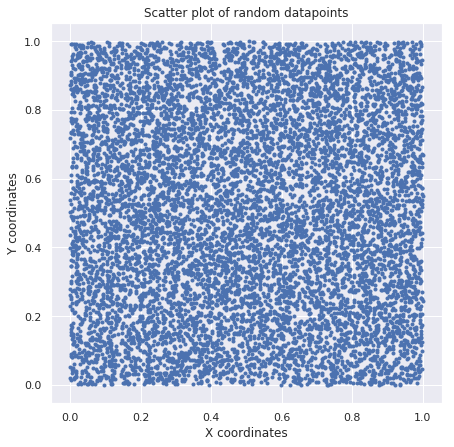

In [740]:
fig_RandomScatter = plt.figure(figsize=(7,7))
ax_RandomScatter = fig_RandomScatter.add_subplot(111)

ax_RandomScatter.scatter(DataPointArray[:,0], DataPointArray[:,1], marker = '.')
ax_RandomScatter.set_xlabel("X coordinates")
ax_RandomScatter.set_ylabel("Y coordinates")
ax_RandomScatter.set_title("Scatter plot of random datapoints")

plt.grid(0.1)

plt.show()

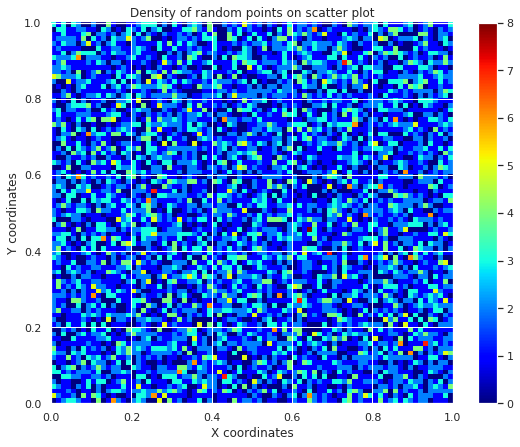

In [885]:
fig_RandomDensity = plt.figure(figsize=(9,7))
ax_RandomDensity = fig_RandomDensity.add_subplot(111)

RandomDensityPlotted = ax_RandomDensity.hist2d(DataPointArray[:,0], DataPointArray[:,1], (80, 80), cmap=plt.cm.jet)
ax_RandomDensity.set_xlabel("X coordinates")
ax_RandomDensity.set_ylabel("Y coordinates")
ax_RandomDensity.set_title("Density of random points on scatter plot")

plt.colorbar(RandomDensityPlotted[3], ax=ax_RandomDensity)

plt.show()

### Seaborn library

In [742]:
# Load data to Pandas DataFrame
df = pd.DataFrame({"x": DataPointArray[:,0], "y": DataPointArray[:,1]})

###### Write to CSV

In [743]:
# Save submission (no index column)
df.to_csv("Task4_scatterplot.csv", index=False, mode='w+')

##### Seaborn scatterplot

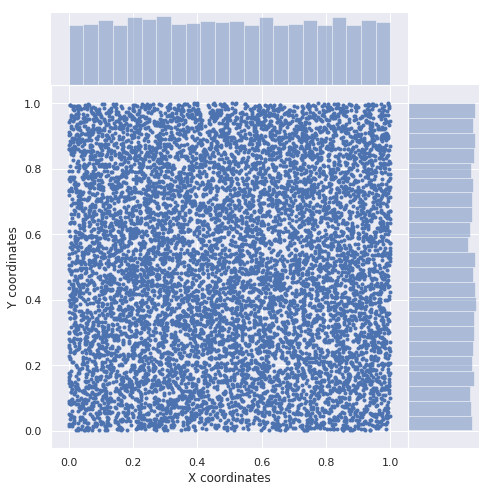

In [886]:
sns.jointplot(x="x", y="y", data=df, height=7, marker = '.', space=0).set_axis_labels("X coordinates", "Y coordinates")

plt.show()

##### Seaborn kernel density estimation

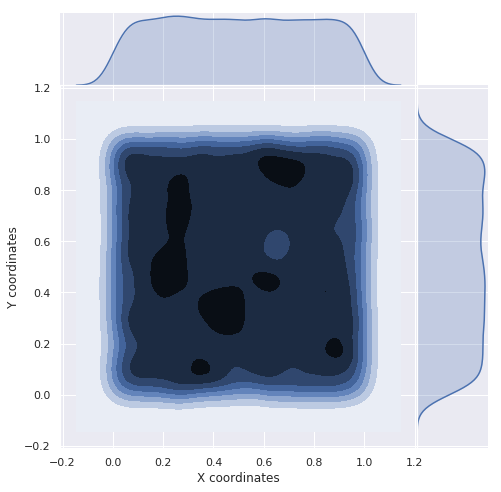

In [887]:
sns.jointplot(x="x", y="y", data=df, height=7, kind="kde", space=0).set_axis_labels("X coordinates", "Y coordinates")

plt.show()

##### Seaborn deep contour level

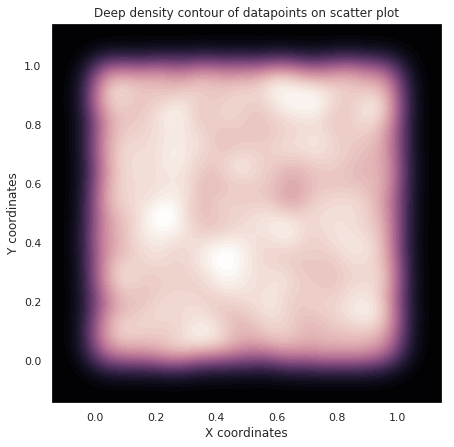

In [746]:
fig_RandomDeepContour = plt.figure(figsize=(7,7))
ax_RandomDeepContour = fig_RandomDeepContour.add_subplot(111)

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

ax_RandomDeepContour.set_title("Deep density contour of datapoints on scatter plot")
ax_RandomDeepContour.set_xlabel("X coordinates")
ax_RandomDeepContour.set_ylabel("Y coordinates")

plt.show()

#### Search for the closeset neighbour of every nodes

In [1191]:
# Run through nodes and store distance values in an np.array
ClosesNeighbourDistances = np.empty(NbOfPoints)

# Find distance between two choosen node
def DistanceBetweenNodes(node1, node2):
    return(np.linalg.norm(node2 - node1))

In [1192]:
def ClosestNeighbour(DataPointArray):
    # Run through points
    for i in range(0,NbOfPoints):
        # Indicating distance to closes neighbour from i-th element
        ActualDistance = 1

        # Measure distance to another point from the first one
        for j in range(0,NbOfPoints):
            
            if(i != j):
                # Calculate distance between i-th and j-th point
                ActualDistanceTemp = DistanceBetweenNodes(DataPointArray[i], DataPointArray[j])

                # Change value of smallest known distance, if the measured one is smaller, than the actually known one
                if(ActualDistanceTemp < ActualDistance):
                    ActualDistance = ActualDistanceTemp

        # At the end of the loop, add smallest known distance to the ClosesNeighbourDistances array
        ClosesNeighbourDistances[i] = ActualDistance

In [1193]:
ClosestNeighbour(DataPointArray)

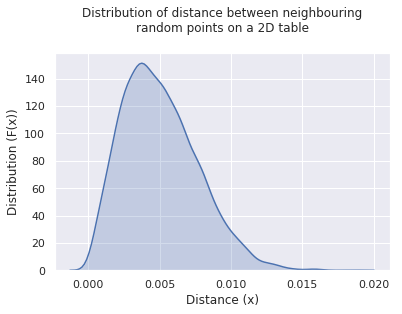

In [1194]:
sns.kdeplot(ClosesNeighbourDistances, shade=True)

plt.xlabel("Distance (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of distance between neighbouring\nrandom points on a 2D table\n")

plt.show()

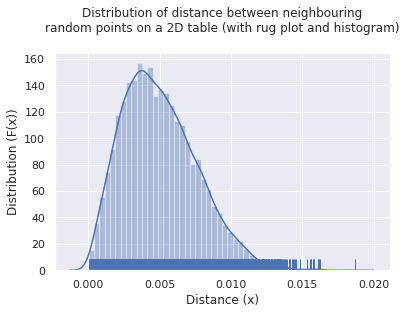

In [1548]:
sns.distplot(ClosesNeighbourDistances, hist=True, rug=True)

plt.xlabel("Distance (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of distance between neighbouring\nrandom points on a 2D table (with rug plot and histogram)\n")

plt.show()

## Task 5
### Floating-point arithmetic

##### Representaion

We can represent floating point numbers [as follows](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html):

$$
\hat{z} = \underbrace{\pm d_{0}, d_{1}, d_{2}, \cdots d_{p-1}}_\text{Mantis/Significand} \times {\underbrace{\beta}_\text{Base}}^{\overbrace{e}^\text{Exp}} = \pm \left( \sum^{p-1}_{i=0}  d_{i} \beta^{-i} \right) \beta^{e}
$$

where, $p$ is the precision (number of floating-point digits), $i$ is the position of the bit of the significand from the left (starting at 0), $e$ is the exponent, and $0 \leq d_{i} \leq \beta$.

Two other parameters associated with floating-point representations are the largest and smallest allowable exponents, $e_{min}$ and $e_{max}$. Since there are $\beta^{p}$ possible significands, and $e_{max} - e_{min} + 1$ possible exponents, a floating-point number can be encoded in

$$
1 + \log_2(e_{max} - e_{min} + 1) + \log_2(\beta^{p})
$$

bits, where the first $1 +$ is for the sign bit.

***

##### Precision

Machine precision is a quantity that characterizes the accuracy of a floating-point system, and is used in backward error analysis of floating-point algorithms. It is also known as unit roundoff or machine epsilon. Usually denoted $Ε_{mach}$, its value depends on the particular rounding being used.

With rounding to zero

$$
Ε_{mach} = \beta^{1-p}
$$

whereas rounding to nearest,

$$
Ε_{mach} = \frac{1}{2} \beta^{1-p}
$$

This is important since it bounds the relative error in representing any non-zero real number x within the normalized range of a floating-point system.

To compute the relative error that corresponds to 0.5 ULP (unit in the last place or unit of least precision), observe that when a real number is approximated by the closest possible floating-point number

$$
d,d,d \cdots d,d \times \beta^{e}
$$

the error can be as large as 

$$
0,0,0 \cdots 0,0 \times \beta' \times \beta^{e}
$$

where $\beta'$ is the digit $\frac{\beta}{2}$, there are $p$ units in the significand of the floating-point number, and $p$ units of $0$ in the significand of the error. This error is

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \beta^{e} = \frac{1}{2} \beta^{1-p} \times \beta^{e}
$$

Since numbers of the form 

$$
d,d,d \cdots d,d \times \beta^{e}
$$ 

all have the same absolute error, but have values that range between $\beta^{e}$ and $\beta \times \beta^{e}$, the relative error ranges between 

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \frac{\beta^{e}}{\beta^{e + 1}} = \frac{1}{2} \beta^{-p}
$$

and

$$
\left( \left( \frac{\beta}{2} \right) \times \beta^{-p} \right) \times \frac{\beta^{e}}{\beta^{e}} = \frac{1}{2} \beta^{1-p}
$$

That is

$$
\frac{1}{2} \beta^{-p} \leq \Delta_{0.5ULP} \leq \frac{1}{2} \beta^{1-p}
$$

Setting the relative error

$$
\varepsilon = \frac{1}{2} \beta^{1-p}
$$

to the largest of the bounds like above, we can say that when a real number is rounded to the closest floating-point number, the relative error is always bounded by $\varepsilon$, which is referred to as machine epsilon.

The $\Delta$ absolute error of a quantity $\hat{z}$ could be calculated using the $\varepsilon$ relative error as follows:

$$
\Delta = \varepsilon \times \hat{z}
$$

In [1547]:
StartNum = -3*math.sqrt(7)

##### Display a number in scientific notation

In [917]:
def SciNotationFormat_FPA(n):
    a = '%.32E' % n
    return(a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1])

In [918]:
print("Simple notation:", StartNum)
print("Scientific (normal) notation:", SciNotationFormat_FPA(StartNum))

Simple notation: -7.937253933193772
Scientific (normal) notation: -7.93725393319377214851328972144984E+00


#### Calculating relative and absolute errors

The arrays if the form of b_p_X contains two quantities, $\beta$ and $p$ in the order of $\left( \beta,p \right)$. We use these vectors to calculate errors, using the method described above.


In [467]:
def CalcEpsRel_FPA(beta,p):
    return(1/2 * (1/beta**(abs(1-p))))

##### First variaton

In [468]:
b_p_1 = np.array((10,2))

In [469]:
epsilonRel_1 = CalcEpsRel_FPA(b_p_1[0],b_p_1[1])
print("Relative error in the first case:", epsilonRel_1)

Relative error in the first case: 0.05


In [470]:
deltaAbs_1 = abs(epsilonRel_1 * StartNum)
print("Absolute error in the first case:", deltaAbs_1)

Absolute error in the first case: 0.39686269665968865


##### Second variaton

In [471]:
b_p_2 = np.array((16,4))

In [472]:
epsilonRel_2 = CalcEpsRel_FPA(b_p_2[0],b_p_2[1])
print("Relative error in the second case:", epsilonRel_2)

Relative error in the second case: 0.0001220703125


In [473]:
deltaAbs_2 = abs(epsilonRel_2 * StartNum)
print("Absolute error in the second case:", deltaAbs_2)

Absolute error in the second case: 0.0009689030680168179


## Task 6
### Calculating the roots of a quadratic equation

#### Cancellation
Without a guard digit (see Task 3), the relative error committed when subtracting two nearby quantities can be very large. In other words, the evaluation of any expression containing a subtraction (or an addition of quantities with opposite signs) could result in a relative error so large that all the digits are meaningless. When subtracting nearby quantities, the most significant digits in the operands match and cancel each other. There are two kinds of cancellation: catastrophic and benign.

*Catastrophic cancellation* occurs when the operands are subject to rounding errors. For example in the quadratic formula, the expression 

$$
b^{2} - 4ac
$$

occurs. The quantities $b^{2}$ and $4ac$ are subject to rounding errors since they are the results of floating-point multiplications. Suppose that they are rounded to the nearest floating-point number, and so are accurate to within 0.5 ULP (see Task 5). When they are subtracted, cancellation can cause many of the accurate digits to disappear, leaving behind mainly digits contaminated by rounding error. Hence the difference might have an error of many ULPs. For example, consider 

$$
a = 1.22
$$
$$
b = 3.34
$$
$$
c = 2.28
$$

The exact value of $b^{2} - 4ac$ is $0.0292$. But $b^{2}$ rounds to $11.2$ and $4ac$ rounds to $11.1$, hence the final answer is $0.1$ which is an error by 70 ULPs, even though $11.2 - 11.1$ is exactly equal to $0.16$. The subtraction did not introduce any error, but rather exposed the error introduced in the earlier multiplications.

*Benign cancellation* occurs when subtracting exactly known quantities. If x and y have no rounding error, then if the subtraction is done with a guard digit, the difference $x - y$ has a very small relative error (less than 2).

A formula that exhibits catastrophic cancellation can sometimes be rearranged to eliminate the problem. Consider the quadratic formula (First formula):

$$
r_{1} = \frac{-b + \sqrt{b^{2} - 4ac}}{2a}
$$
$$
r_{2} = \frac{-b - \sqrt{b^{2} - 4ac}}{2a}
$$

When $b^{2} \gg ac$, then $b^{2} - 4ac$ does not involve a cancellation and

$$
\sqrt{b^{2} - 4ac} \approx \left| b \right|
$$

But the other addition (subtraction) in one of the formulas will have a catastrophic cancellation. To avoid this, multiply the numerator and denominator of $r_{1}$ and $r_{2}$ by

$$
-b - \sqrt{b^{2} - 4ac}
$$

to obtain the Second formula:

$$
r_{1} = \frac{2c}{-b - \sqrt{b^{2} - 4ac}}
$$
$$
r_{2} = \frac{2c}{-b + \sqrt{b^{2} - 4ac}}
$$

If $b^{2} \gg ac$ and $b > 0$, then computing $r_{1}$ using the First formula will involve a cancellation. Therefore, use the Second formula for computing $r_{1}$ and the First formula for $r_{2}$. On the other hand, if $b < 0$, use the First formula for computing $r_{1}$ and the Second formula for $r_{2}$.


##### Initial variables

In [520]:
a_Quad = 1
b_Quad = -1e+08
c_Quad = 1

Write a function to calculate $r_{1}$ and $r_{2}$, wheter $b < 0$ or $b > 0$, using the two formula above.

In [753]:
def QuadSolver(a_Quad,b_Quad,c_Quad):
    
    if(b_Quad < 0):
        r_1_Quad = (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        r_2_Quad = (2*c_Quad) / (-b_Quad + math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        
    else:
        r_1_Quad = (2*c_Quad) / (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad))
        r_2_Quad = (-b_Quad - math.sqrt(b_Quad**2 - 4*a_Quad*c_Quad)) / (2*a_Quad)
        
    return(r_1_Quad,r_2_Quad)

In [754]:
r_1_Quad, r_2_Quad = QuadSolver(a_Quad,b_Quad,c_Quad)

print("Root #1:", r_1_Quad)
print("Root #2:", r_2_Quad)

Root #1: 100000000.0
Root #2: 1e-08


##### Check result

In [755]:
# Should be ~0
print("ax^2 + bx + c with root #1:", SmartAdd(SmartAdd(a_Quad * (r_1_Quad**2),b_Quad * r_1_Quad),c_Quad))
print("ax^2 + bx + c with root #2:", SmartAdd(SmartAdd(a_Quad * (r_2_Quad**2),b_Quad * r_2_Quad),c_Quad))

ax^2 + bx + c with root #1: 1
ax^2 + bx + c with root #2: 1.0000000000000001E-16


### True roots
Algebraically the roots would be the following:

$$
x_{1,2} = -50\ 000\ 000 \pm \sqrt{2\ 499\ 999\ 999\ 999\ 999}
$$

The non-zero digits are out of the range of the floating-point precision. The approximate value of the roots above, would be

$$
-50\ 000\ 000 + \sqrt{2\ 499\ 999\ 999\ 999\ 999} \approx -1.000000000000000100000000000000020000000000000005000 \dots \times 10^{-8}
$$

$$
-50\ 000\ 000 - \sqrt{2\ 499\ 999\ 999\ 999\ 999} \approx -9.999999999999998999999999999999899999999999999980000 \dots \times 10^{7}
$$

## Task 7
### Heron's formula

The algorithm for calculating a triangle's area is the well-known Heron's formula. It states that the area of a triangle whose sides have lengths $a$, $b$, and $c$ is

$$
A = \sqrt{s \left( s-a \right) \left( s-b \right) \left( s-c \right)}
$$

Heron's formula as given above is numerically unstable for triangles with a very small angle when using floating point arithmetic. A stable alternative involves arranging the lengths of the sides so that $a \geq b \geq c$ and computing:

$$
A = \frac{1}{4}\sqrt{ \left( a + \left( b + c \right) \right) \left( c − \left( a − b \right) \right) \left( c + \left( a − b \right) \right) \left( a + \left( b − c \right) \right)}
$$

Where

$$
s = \frac{a+b+c}{2}
$$

The brackets in the above formula are required in order to prevent numerical instability in the evaluation.

##### Set length of sides and $\left( \beta, p \right)$

In [1196]:
Side_a = 9
Side_b = 4.53
Side_c = 4.53

b_p_Heron = np.array((10,3))

##### Calculate half-circumference

In [1197]:
s_Heron = (Side_a + Side_b + Side_c) / 2

print("Half-circumference", s_Heron)

Half-circumference 9.030000000000001


##### Compare the two implementations of Heron's formula

In [1198]:
A_1 = math.sqrt(s_Heron * (s_Heron - Side_a) * (s_Heron - Side_b) * (s_Heron - Side_c))

In [1199]:
A_2 = 1/4 * math.sqrt((Side_a + (Side_b + Side_c)) * (Side_c - (Side_a - Side_b)) * (Side_c + (Side_a - Side_b)) * (Side_a + (Side_b - Side_c)))

In [1200]:
print("Heron Standard:", A_1)
print("Heron Numerically corrected:", A_2)

print("\nDifference:", abs(A_2 - A_1))

Heron Standard: 2.3421624623412036
Heron Numerically corrected: 2.3421624623411685

Difference: 3.5083047578154947e-14


#### Calculating relative and absolute errors

The arrays in the form of b_p_X contains two quantities, $\beta$ and $p$ in the order of $\left( \beta,p \right)$. We use these vectors to calculate errors, using the method described in Task 5.

In [1201]:
def CalcEpsRel_Heron(beta,p):
    return(1/2 * (1/beta**(abs(1-p))))

In [1202]:
# Initial b_p_X
b_p_Heron = np.array((10,3))

The relative errors are always the same, because they're only depend from $\left( \beta,p \right)$

In [1203]:
epsilonRel_Heron = CalcEpsRel_Heron(b_p_Heron[0],b_p_Heron[1])
print("Relative error:", epsilonRel_Heron)

Relative error: 0.005


##### First case

In [1204]:
deltaAbs_Heron_1 = epsilonRel_Heron * A_1
print("Absolute error in the first case:", deltaAbs_Heron_1)

Absolute error in the first case: 0.011710812311706018


##### Second case

In [1205]:
deltaAbs_Heron_2 = epsilonRel_Heron * A_2
print("Absolute error in the first case:", deltaAbs_Heron_2)

Absolute error in the first case: 0.011710812311705843


##### Difference

In [1206]:
print("Difference between errors:", abs(deltaAbs_Heron_2 - deltaAbs_Heron_1))

Difference between errors: 1.7520707107365752e-16


## Task 8
### Machine epsilon

Machine epsilon by definiton:

$$
\varepsilon = \frac{1}{2} \beta^{1-p}
$$

### Octave

![64bit](img/64bit.png)

Machine epsilon in octave could be displayed by a built-in function, $eps()$, which returns, that

$$
\varepsilon = 2.220446049250313^{-16}
$$

Based on the magnitude of this value, we can say that a floating-point number's significand is stored on 64 bits, where the sign part takes up 1 bit, the exponent takes up 11 bits, and the mantis/significand takes up 52 bits. If we need to display more numbers on the left side of the comma, we will lose bits, and therefore decimal places on the right side. The precision will deteriorate in these cases for small numbers.

Note that by default numeric constants (like $\varepsilon$) are represented within Octave by IEEE 754 double precision (binary64) floating-point format.

Let's test the same for Python too.

In [1567]:
print("2.220446049250313:", 2.220446049250313, "\n")

print("-2.220446049250313:", -2.220446049250313, "\n")

print("22.220446049250313:", 22.220446049250313, "\n")

print("222.220446049250313:", 222.220446049250313, "\n")

print("-222.220446049250313:", -222.220446049250313)

2.220446049250313: 2.220446049250313 

-2.220446049250313: -2.220446049250313 

22.220446049250313: 22.220446049250313 

222.220446049250313: 222.2204460492503 

-222.220446049250313: -222.2204460492503


### Python
##### Using existing libraries
Python has it's own functions too, to display machine epsilon.

In [1546]:
print("float epsilon:", np.finfo(float).eps)

print("np.float32 epsilon:", np.finfo(np.float32).eps)

print("np.float64 epsilon:", np.finfo(np.float64).eps)

float epsilon: 2.220446049250313e-16
np.float32 epsilon: 1.1920929e-07
np.float64 epsilon: 2.220446049250313e-16


##### Other methods

In [1136]:
def FloatEpsilon():
    # Starting value
    Epsilon = 1.0
    
    while(1.0 + Epsilon != 1.0):
        Epsilon = Epsilon / 2.0
        
    '''Last iteration will half the floating-point epsilon, and 
    returns that value, so we need to multiply with 2'''
    return(2 * Epsilon)

In [1137]:
print("Floating-point epsilon:", FloatEpsilon())

Floating-point epsilon: 2.220446049250313e-16


## Task 9
### Random number generator with shift-register and XOR

The 128bit XorShift function (with period $2^{128}-1$) generates pseudo-random numbers with seeds $x,y,z,w$ in the following way in C language:

```c
u_int64 XorShift128(){
    t=(xˆ(x<<a));
    x=y;
    y=z;
    z=w;
    return w=(wˆ(w>>c))ˆ(tˆ(t>>b))
}
```

The 160bit XorShift function (with period $2^{160}-1$), which generates pseudo-random numbers with seeds $x,y,z,w,v$, could be interpreted as follows:

```c
u_int64 XorShift160(){
    t=(xˆ(x>>a));
    x=y;
    y=z;
    z=w;
    w=v;
    return v=(vˆ(v>>c))ˆ(tˆ(t>>b));
}
```

Where $\ll$ and $\gg$ operators represent left and right bitwise shifts, respectively. The $\text{^}$ operator represents the bitwise XOR. $a,b,c$ variables are carefully selected triplets. In his ["Xorshift RNGs"](https://www.jstatsoft.org/article/view/v008i14) paper in 2003, George Marsaglia described *the best* triplets, as

$$
[a,b,c]=[2,1,4],[7,13,6],[1,1,20]
$$


In [1003]:
import random # For seeds

In [930]:
NbOfRNsXorShift = int(input("Amount of generated random numbers: ") or "200")

Amount of generated random numbers: 200


### XorShift128

##### Compose XorShift128 function as described above

In [1050]:
def XorShift128(x_128, y_128, z_128, w_128, a_128, b_128, c_128):

    # Generate array for RNs
    RNsArrayXorShift_128 = np.empty(NbOfRNsXorShift)

    for i in range(NbOfRNsXorShift):
        # Algorithm "xor160" from p. 5 of Marsaglia, "Xorshift RNGs"
        t_128 = (x_128^(x_128<<a_128));
        x_128 = y_128;
        y_128 = z_128;
        z_128 = w_128;
        w_128 = w_128^(w_128>>c_128)
        w_128 = w_128^(t_128^(t_128>>b_128))
        RNsArrayXorShift_128[i] = w_128

    return(RNsArrayXorShift_128)

##### Define initial variables for XorShift128

In [1092]:
MaxLimit_128 = 1e+08

x_128_0 = random.randrange(0,MaxLimit_128)
y_128_0 = random.randrange(0,MaxLimit_128)
z_128_0 = random.randrange(0,MaxLimit_128)
w_128_0 = random.randrange(0,MaxLimit_128)

a_128 = 7
b_128 = 13
c_128 = 6

RNsArrayXorShift_128 = XorShift128(x_128=x_128_0, y_128=y_128_0, z_128=z_128_0, w_128=w_128_0, a_128=a_128, b_128=b_128, c_128=c_128)

In [1093]:
#print("Generated random numbers with XorShift128:\n", RNsArrayXorShift_128)

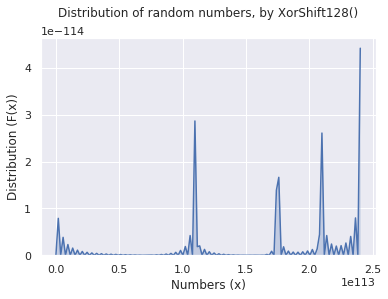

In [1094]:
sns.kdeplot(RNsArrayXorShift_128, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by XorShift128()\n")

plt.show()

### XorShift160

##### Compose XorShift160 function as described above

In [1095]:
def XorShift160(x_160, y_160, z_160, w_160, v_160, a_160, b_160, c_160):

    # Generate array for RNs
    RNsArrayXorShift_160 = np.empty(NbOfRNsXorShift)

    for i in range(NbOfRNsXorShift):
        # Algorithm "xor160" from p. 5 of Marsaglia, "Xorshift RNGs"
        t_160 = (x_160^(x_160<<a_160));
        x_160 = y_160;
        y_160 = z_160;
        z_160 = w_160;
        w_160 = v_160;
        v_160 = (v_160^(v_160>>c_160))^(t_160^(t_160>>b_160));
        RNsArrayXorShift_160[i] = v_160

    return(RNsArrayXorShift_160)

##### Define initial variables for XorShift160

In [1145]:
MaxLimit_160 = 1e+08

x_160_0 = random.randrange(0,MaxLimit_160)
y_160_0 = random.randrange(0,MaxLimit_160)
z_160_0 = random.randrange(0,MaxLimit_160)
w_160_0 = random.randrange(0,MaxLimit_160)
v_160_0 = random.randrange(0,MaxLimit_160)

a_160 = 7
b_160 = 13
c_160 = 6

RNsArrayXorShift_160 = XorShift160(x_160=x_160_0, y_160=y_160_0, z_160=z_160_0, w_160=w_160_0, v_160=v_160_0, a_160=a_160, b_160=b_160, c_160=c_160)

In [1146]:
#print("Generated random numbers with XorShift160:\n", RNsArrayXorShift_160)

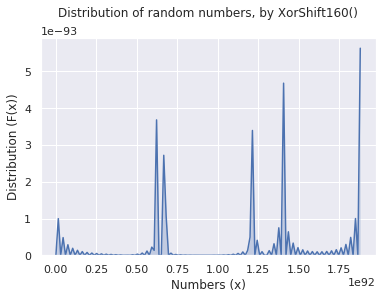

In [1147]:
sns.kdeplot(RNsArrayXorShift_160, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by XorShift160()\n")

plt.show()

### Comparing to built-in RNGs
##### Python's random.uniform() funtion

In [1138]:
'''import random''';

In [1107]:
RNsArrayPythonRandom = np.empty(NbOfRNsXorShift)

for i in range(NbOfRNsXorShift):
    RNsArrayPythonRandom[i] = random.uniform(0, 1e+50)

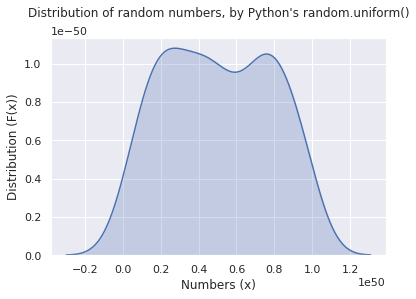

In [1108]:
sns.kdeplot(RNsArrayPythonRandom, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Python's random.uniform()\n")

plt.show()

##### Numpy's random.rand() function

In [1122]:
RNsArrayNumpyRand = np.random.rand(NbOfRNsXorShift)

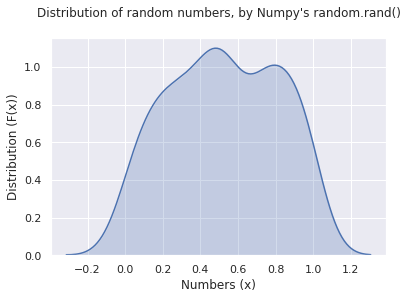

In [1123]:
sns.kdeplot(RNsArrayNumpyRand, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.rand()\n")

plt.show()

##### Numpy's random.randint() finction

In [1124]:
RNsArrayNumpyRandint = np.random.randint(low=0, high=1e+18, size=NbOfRNsXorShift)

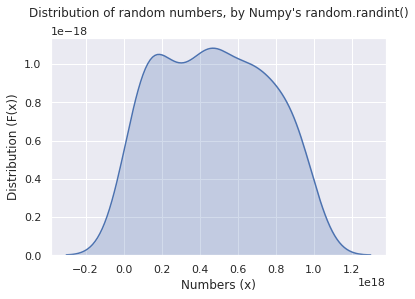

In [1125]:
sns.kdeplot(RNsArrayNumpyRandint, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.randint()\n")

plt.show()

##### Numpy's random.normal() finction

In [1126]:
RNsArrayNumpyNormal = np.random.normal(size=NbOfRNsXorShift)

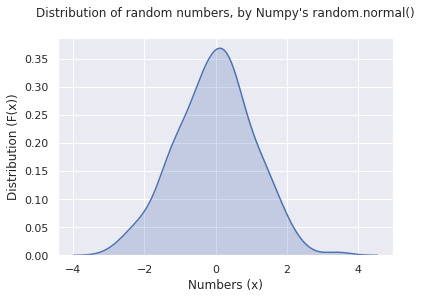

In [1128]:
sns.kdeplot(RNsArrayNumpyNormal, shade=True)

plt.xlabel("Numbers (x)")
plt.ylabel("Distribution (F(x))")
plt.title("Distribution of random numbers, by Numpy's random.normal()\n")

plt.show()

## Task 10
### Multiplicative congruential random number generator

Multiplicative congruential pseudo-random number generator, generates numbers by a recursive equation, containing 3 parameters and 1 variable, as follows:

$$
x_{i+1} = \left( a*x_{i} + b \right)\ mod\ m
$$

In [1533]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

##### Initial variables

In [1534]:
a = 13
b = 0
m = 150
x_0 = 1

##### Generating numbers in the $\left[ 0,1 \right]$ interval

In [1535]:
def MultCongRNG(a,b,m):
    global x_0
    x_p = ((a * x_0 + b) % m) / m
    x_0 = x_p * m

    return(x_p)

In [1536]:
RndNum = MultCongRNG(a,b,m)
print("Generated random number:", RndNum)

Generated random number: 0.08666666666666667


### Marsaglia's theorem/Marsaglia effect

The Marsaglia effect encapsulates the regularity, appearing in the numbers as pseudo-random numbers are generated. It was named after its descriptor, Marsaglira.
Marsaglia has shown that n-dimensional vectors, which were created by a pseudo-random generator will be located on a finite number of parallel n-dimensional surfaces, when they're represented.

To show the Marsaglia effect, we create thousands of 3-dimensional vectors, as follows:

$$
\left( x_{0}, x_{1}, x_{3} \right), \left( x_{4}, x_{5}, x_{6} \right), \left( x_{7}, x_{8}, x_{9} \right) \cdots
$$

Then we plot them on a cluster density graph, and a 2D scatter plot for demonstration.

In [1537]:
DimOfMarsaglia = int(input("Please enter the dimension of examined vectors: ") or "3")

Please enter the dimension of examined vectors: 3


In [1538]:
NbOfMarsaglia = int(input("Please enter the number of examined vectors: ") or "15000")

Please enter the number of examined vectors: 15000


In [1539]:
MarsagliaArray = np.empty((NbOfMarsaglia, 3))

In [1540]:
for i in range (NbOfMarsaglia):
    for j in range(DimOfMarsaglia):
        MarsagliaArray[i,j] = MultCongRNG(a,b,m)

In [1541]:
print("Preview of the created array:\n", MarsagliaArray)

Preview of the created array:
 [[0.12666667 0.64666667 0.40666667]
 [0.28666667 0.72666667 0.44666667]
 [0.80666667 0.48666667 0.32666666]
 ...
 [0.44458957 0.77966441 0.13563733]
 [0.76328526 0.92270842 0.99520952]
 [0.93772382 0.1904097  0.47532609]]


##### 3D Scatter plot

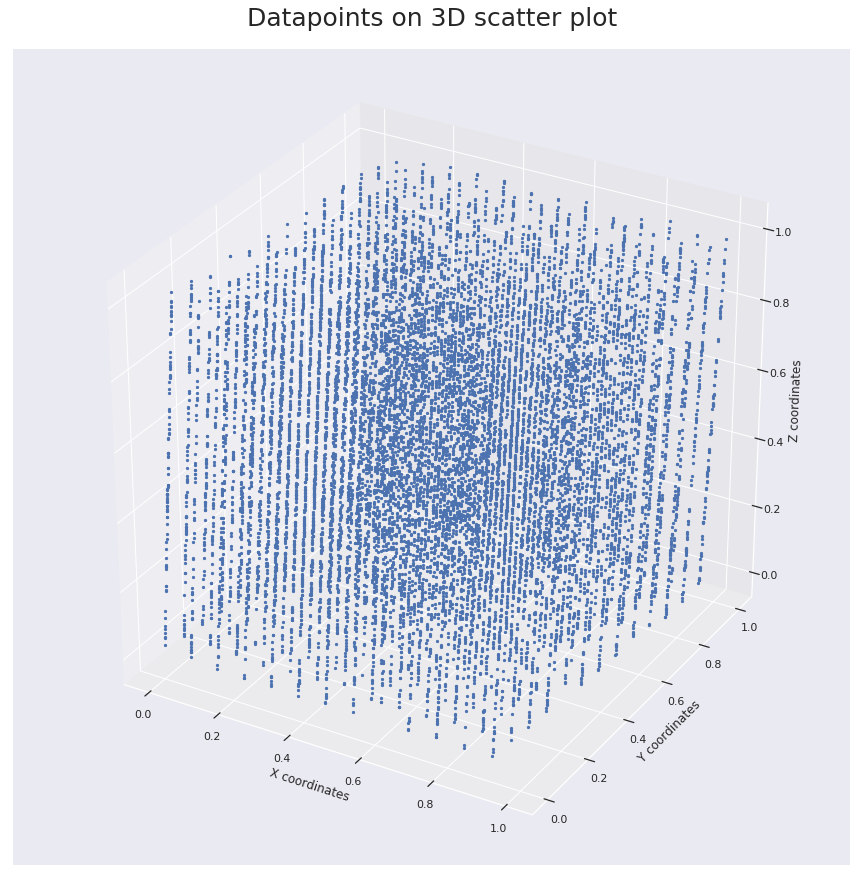

In [1542]:
fig_MarsagliaScatter = plt.figure(figsize=(15,15))
ax_MarsagliaScatter = fig_MarsagliaScatter.add_subplot(111, projection='3d')

ax_MarsagliaScatter.scatter(xs=MarsagliaArray.T[0], ys=MarsagliaArray.T[1], zs=MarsagliaArray.T[2], zdir='z', s=20, c=None, depthshade=False, marker='.')
ax_MarsagliaScatter.set_xlabel("X coordinates")
ax_MarsagliaScatter.set_ylabel("Y coordinates")
ax_MarsagliaScatter.set_zlabel("Z coordinates")

plt.title("Datapoints on 3D scatter plot\n\n\n", fontsize=25)

plt.show()

It is clearly visible, that "random numbers fall mainly in the planes", as Marsaglia said!

#### Initial calculations for density plots

In [1543]:
x_MarsagliaDensity = MarsagliaArray.T[0]
y_MarsagliaDensity = MarsagliaArray.T[1]
z_MarsagliaDensity = MarsagliaArray.T[2]

xyz_MarsagliaDensity = np.vstack([x_MarsagliaDensity,y_MarsagliaDensity,z_MarsagliaDensity])
density_MarsagliaDensity = stats.gaussian_kde(xyz_MarsagliaDensity)(xyz_MarsagliaDensity)

idx = density.argsort()
x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, density_MarsagliaDensity = x_MarsagliaDensity[idx], y_MarsagliaDensity[idx], z_MarsagliaDensity[idx], density_MarsagliaDensity[idx]

##### 3D density plot

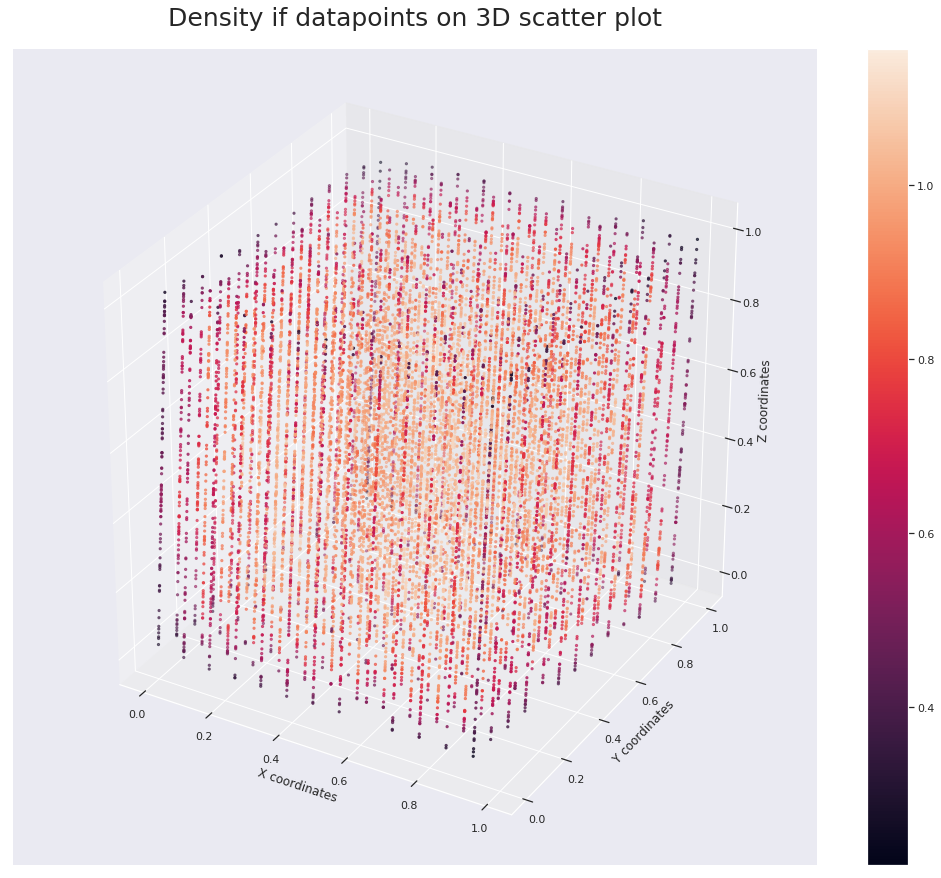

In [1544]:
fig_MarsagliaDensity = plt.figure(figsize=(18,15))
ax_MarsagliaDensity = fig_MarsagliaDensity.add_subplot(111, projection='3d')

PlottedMarsagliaContour = ax_MarsagliaDensity.scatter(x_MarsagliaDensity, y_MarsagliaDensity, z_MarsagliaDensity, c=density_MarsagliaDensity, marker='.')
ax_MarsagliaDensity.set_xlabel("X coordinates")
ax_MarsagliaDensity.set_ylabel("Y coordinates")
ax_MarsagliaDensity.set_zlabel("Z coordinates")

plt.title("Density if datapoints on 3D scatter plot\n\n\n", fontsize=25)

fig_MarsagliaDensity.colorbar(PlottedMarsagliaContour)

plt.show()

#### 2D scatter along axes

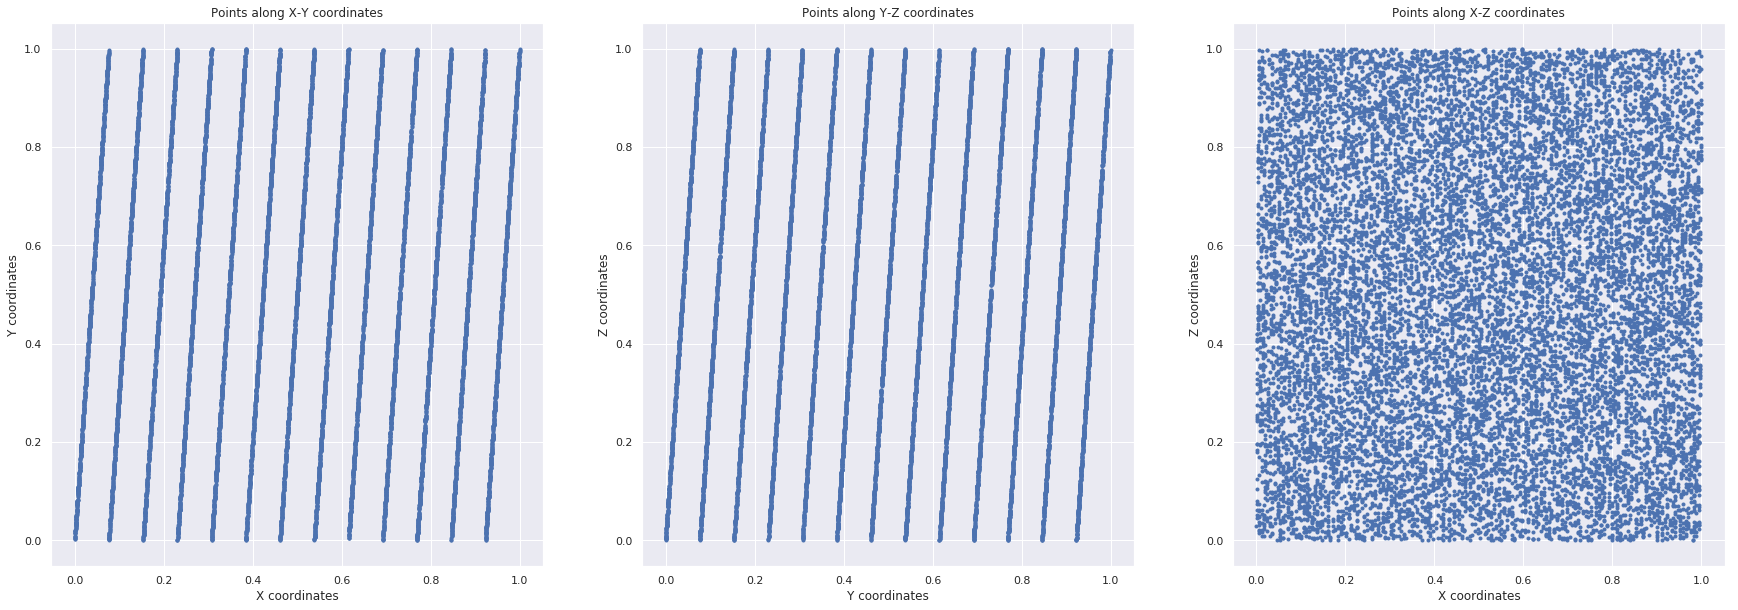

In [1545]:
fig_RandomDeepContour = plt.figure(figsize=(30,10))
ax_MarsagliaContour_XY, ax_MarsagliaContour_YZ, ax_MarsagliaContour_XZ = fig_RandomDeepContour.subplots(1, 3)

ax_MarsagliaContour_XY.scatter(MarsagliaArray.T[0], MarsagliaArray.T[1], marker='.')
ax_MarsagliaContour_YZ.scatter(MarsagliaArray.T[1], MarsagliaArray.T[2], marker='.')
ax_MarsagliaContour_XZ.scatter(MarsagliaArray.T[0], MarsagliaArray.T[2], marker='.')

ax_MarsagliaContour_XY.set_xlabel("X coordinates")
ax_MarsagliaContour_XY.set_ylabel("Y coordinates")
ax_MarsagliaContour_XY.set_title("Points along X-Y coordinates")

ax_MarsagliaContour_YZ.set_xlabel("Y coordinates")
ax_MarsagliaContour_YZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_YZ.set_title("Points along Y-Z coordinates")

ax_MarsagliaContour_XZ.set_xlabel("X coordinates")
ax_MarsagliaContour_XZ.set_ylabel("Z coordinates")
ax_MarsagliaContour_XZ.set_title("Points along X-Z coordinates")

plt.show()